In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import xgboost as xgb
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv


# PH - Introduce_Data_Set & Purpose

In [2]:
maindf = pd.read_csv(r"../input/house-prices-advanced-regression-techniques/train.csv")

In [3]:
maindf.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# PH - EDA: Visualize NaNs, Categoricals, etc.

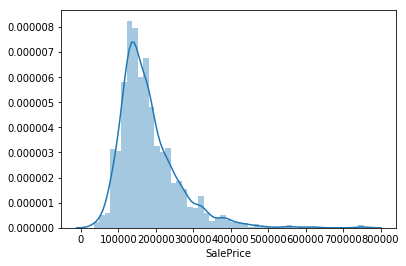

In [4]:
sns.distplot(maindf.SalePrice)
plt.show()

In [5]:
def graph_feature(data, kind):
    """
    Takes a Dataframe column / Series and a graph type. Displays the different possible categories and then plots the graph. 
    Maybe build in way to do subplots as an optional param later?
    """
    data.value_counts().plot(kind=kind, subplots=True) 
    print("The categorical values in this feature are: ")
    print(data.value_counts())

The categorical values in this feature are: 
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64


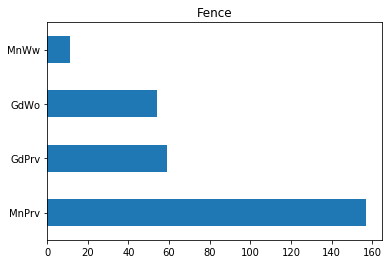

In [6]:
graph_feature(maindf['Fence'], 'barh')

The categorical values in this feature are: 
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64


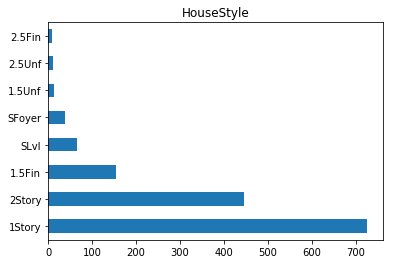

In [7]:
graph_feature(maindf['HouseStyle'], 'barh')

The categorical values in this feature are: 
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64


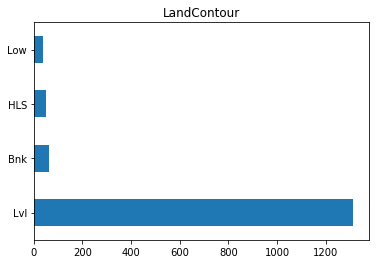

In [8]:
graph_feature(maindf['LandContour'], 'barh')

In [9]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [10]:
def check_nan_percentage(data):
    """This function will return the percentage of values in the column that are NaN."""
    percent = (len(data.loc[data.isnull()]) / len(data)) * 100
    return percent

In [11]:
check_nan_percentage(maindf['LotFrontage'])
scarce_columns = []
exists_nan = []

for column in maindf:
    if check_nan_percentage(maindf[column]) >= 20:
        scarce_columns.append(maindf[column].name)
    elif check_nan_percentage(maindf[column]) > 0:
        exists_nan.append(maindf[column].name)
    else:
        pass

print("These columns have greater than 20% of data missing, consider dropping: " + str(scarce_columns))
print("These columns have a NaN value and will need attention: " + str(exists_nan))
print("\n")
print("Here are the percentage null for these scarcity cases: ")
print("\n")
for column in scarce_columns:
    print("Column " + str(column) + " has " + str(check_nan_percentage(maindf[column])) + " percentage of nulls.")
print("\n")
print("These columns have nulls, but not to an extreme degree: ")
print("\n")
for column in exists_nan:
    print("Column " + str(column) + " has " + str(check_nan_percentage(maindf[column])) + " percentage of nulls.")    

These columns have greater than 20% of data missing, consider dropping: ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
These columns have a NaN value and will need attention: ['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']


Here are the percentage null for these scarcity cases: 


Column Alley has 93.76712328767123 percentage of nulls.
Column FireplaceQu has 47.26027397260274 percentage of nulls.
Column PoolQC has 99.52054794520548 percentage of nulls.
Column Fence has 80.75342465753424 percentage of nulls.
Column MiscFeature has 96.30136986301369 percentage of nulls.


These columns have nulls, but not to an extreme degree: 


Column LotFrontage has 17.73972602739726 percentage of nulls.
Column MasVnrType has 0.547945205479452 percentage of nulls.
Column MasVnrArea has 0.547945205479452 percentage of nulls.
Column BsmtQ

## Looks like we have a bunch of columns that are VERY scarce.
### Taking a look at scarcity of data, we can drop the following columns:
* PoolQC
* MiscFeature
* Alley
* Fence
* FireplaceQu

# PH - Cleaning Time: Drop the Scarce rows, fill NaNs, 

In [12]:
#clean data, drop columns, etc
maindf.drop(columns = [
    'PoolQC',
    'MiscFeature',
    'Alley',
    'Fence',
    'FireplaceQu'
], inplace=True)

### For the remainder of those columns that have NaNs, let's split them up into numerical / categorical 

In [13]:
exists_nan_cats = []
exists_nan_nums = []

for column in exists_nan:
    if maindf[column].dtype == 'object':
        print("Column " + str(column) + " is a categorical data type.")
        exists_nan_cats.append(maindf[column].name)
    else:
        print("Column " + str(column) + " is a numerical data type")
        exists_nan_nums.append(maindf[column].name)

Column LotFrontage is a numerical data type
Column MasVnrType is a categorical data type.
Column MasVnrArea is a numerical data type
Column BsmtQual is a categorical data type.
Column BsmtCond is a categorical data type.
Column BsmtExposure is a categorical data type.
Column BsmtFinType1 is a categorical data type.
Column BsmtFinType2 is a categorical data type.
Column Electrical is a categorical data type.
Column GarageType is a categorical data type.
Column GarageYrBlt is a numerical data type
Column GarageFinish is a categorical data type.
Column GarageQual is a categorical data type.
Column GarageCond is a categorical data type.


### We're going to take these columns and fill their NaNs so we can use OneHotEncoder. 

#### For the Numerical Values, we will most likely either use zero or the mean to fill.
#### For the Categorical Values, we will have to get creative. Perhaps we will select a type at random or Replace NaN with 'None' or 'DNE'.

In [14]:
for column in exists_nan_cats:
    maindf[column].fillna(value='None', inplace=True)
for column in exists_nan_nums:
    maindf[column].fillna(maindf[column].mean(), inplace=True)
    
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non

In [15]:
def check_cat_depth(data):
    """Takes a pandas Series and returns how many different categories are in the Series."""
    print("The data point " + data.name + " has " + str(len(data.unique())) + " different categories.")

In [16]:
cat_cols = maindf.select_dtypes(include='object')
cat_cols

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [17]:
#our encoded dataset is about to get REAL wide....
for column in cat_cols:
    check_cat_depth(cat_cols[column])

The data point MSZoning has 5 different categories.
The data point Street has 2 different categories.
The data point LotShape has 4 different categories.
The data point LandContour has 4 different categories.
The data point Utilities has 2 different categories.
The data point LotConfig has 5 different categories.
The data point LandSlope has 3 different categories.
The data point Neighborhood has 25 different categories.
The data point Condition1 has 9 different categories.
The data point Condition2 has 8 different categories.
The data point BldgType has 5 different categories.
The data point HouseStyle has 8 different categories.
The data point RoofStyle has 6 different categories.
The data point RoofMatl has 8 different categories.
The data point Exterior1st has 15 different categories.
The data point Exterior2nd has 16 different categories.
The data point MasVnrType has 4 different categories.
The data point ExterQual has 4 different categories.
The data point ExterCond has 5 differ

### We're kind of lucky for this competition because pd.get_dummies() will default encode any columns with datatype Object or Category. All of our columns that require encoding are of Object type, so we can just run this function as-is.

In [18]:
#Before
maindf

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [19]:
#after
encoded_df = pd.get_dummies(maindf)
encoded_df
#print(encoded_df.shape)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


In [20]:
# from sklearn.preprocessing import LabelEncoder
# cat_cols.columns

# column_mask = []
# for column_name in list(cat_cols.columns.values):
#     column_mask.append(column_name in cat_cols)
    
# le = LabelEncoder()

# maindf[cat_cols.columns] = maindf[cat_cols.columns].apply(lambda x: le.fit_transform(x))

# from sklearn.preprocessing import OneHotEncoder
# OHE = OneHotEncoder(categories='auto')
# encoded_df = OHE.fit_transform(maindf)

# encoded_df
# print(encoded_df.shape)
# deprecated or not working code

<Figure size 432x288 with 0 Axes>

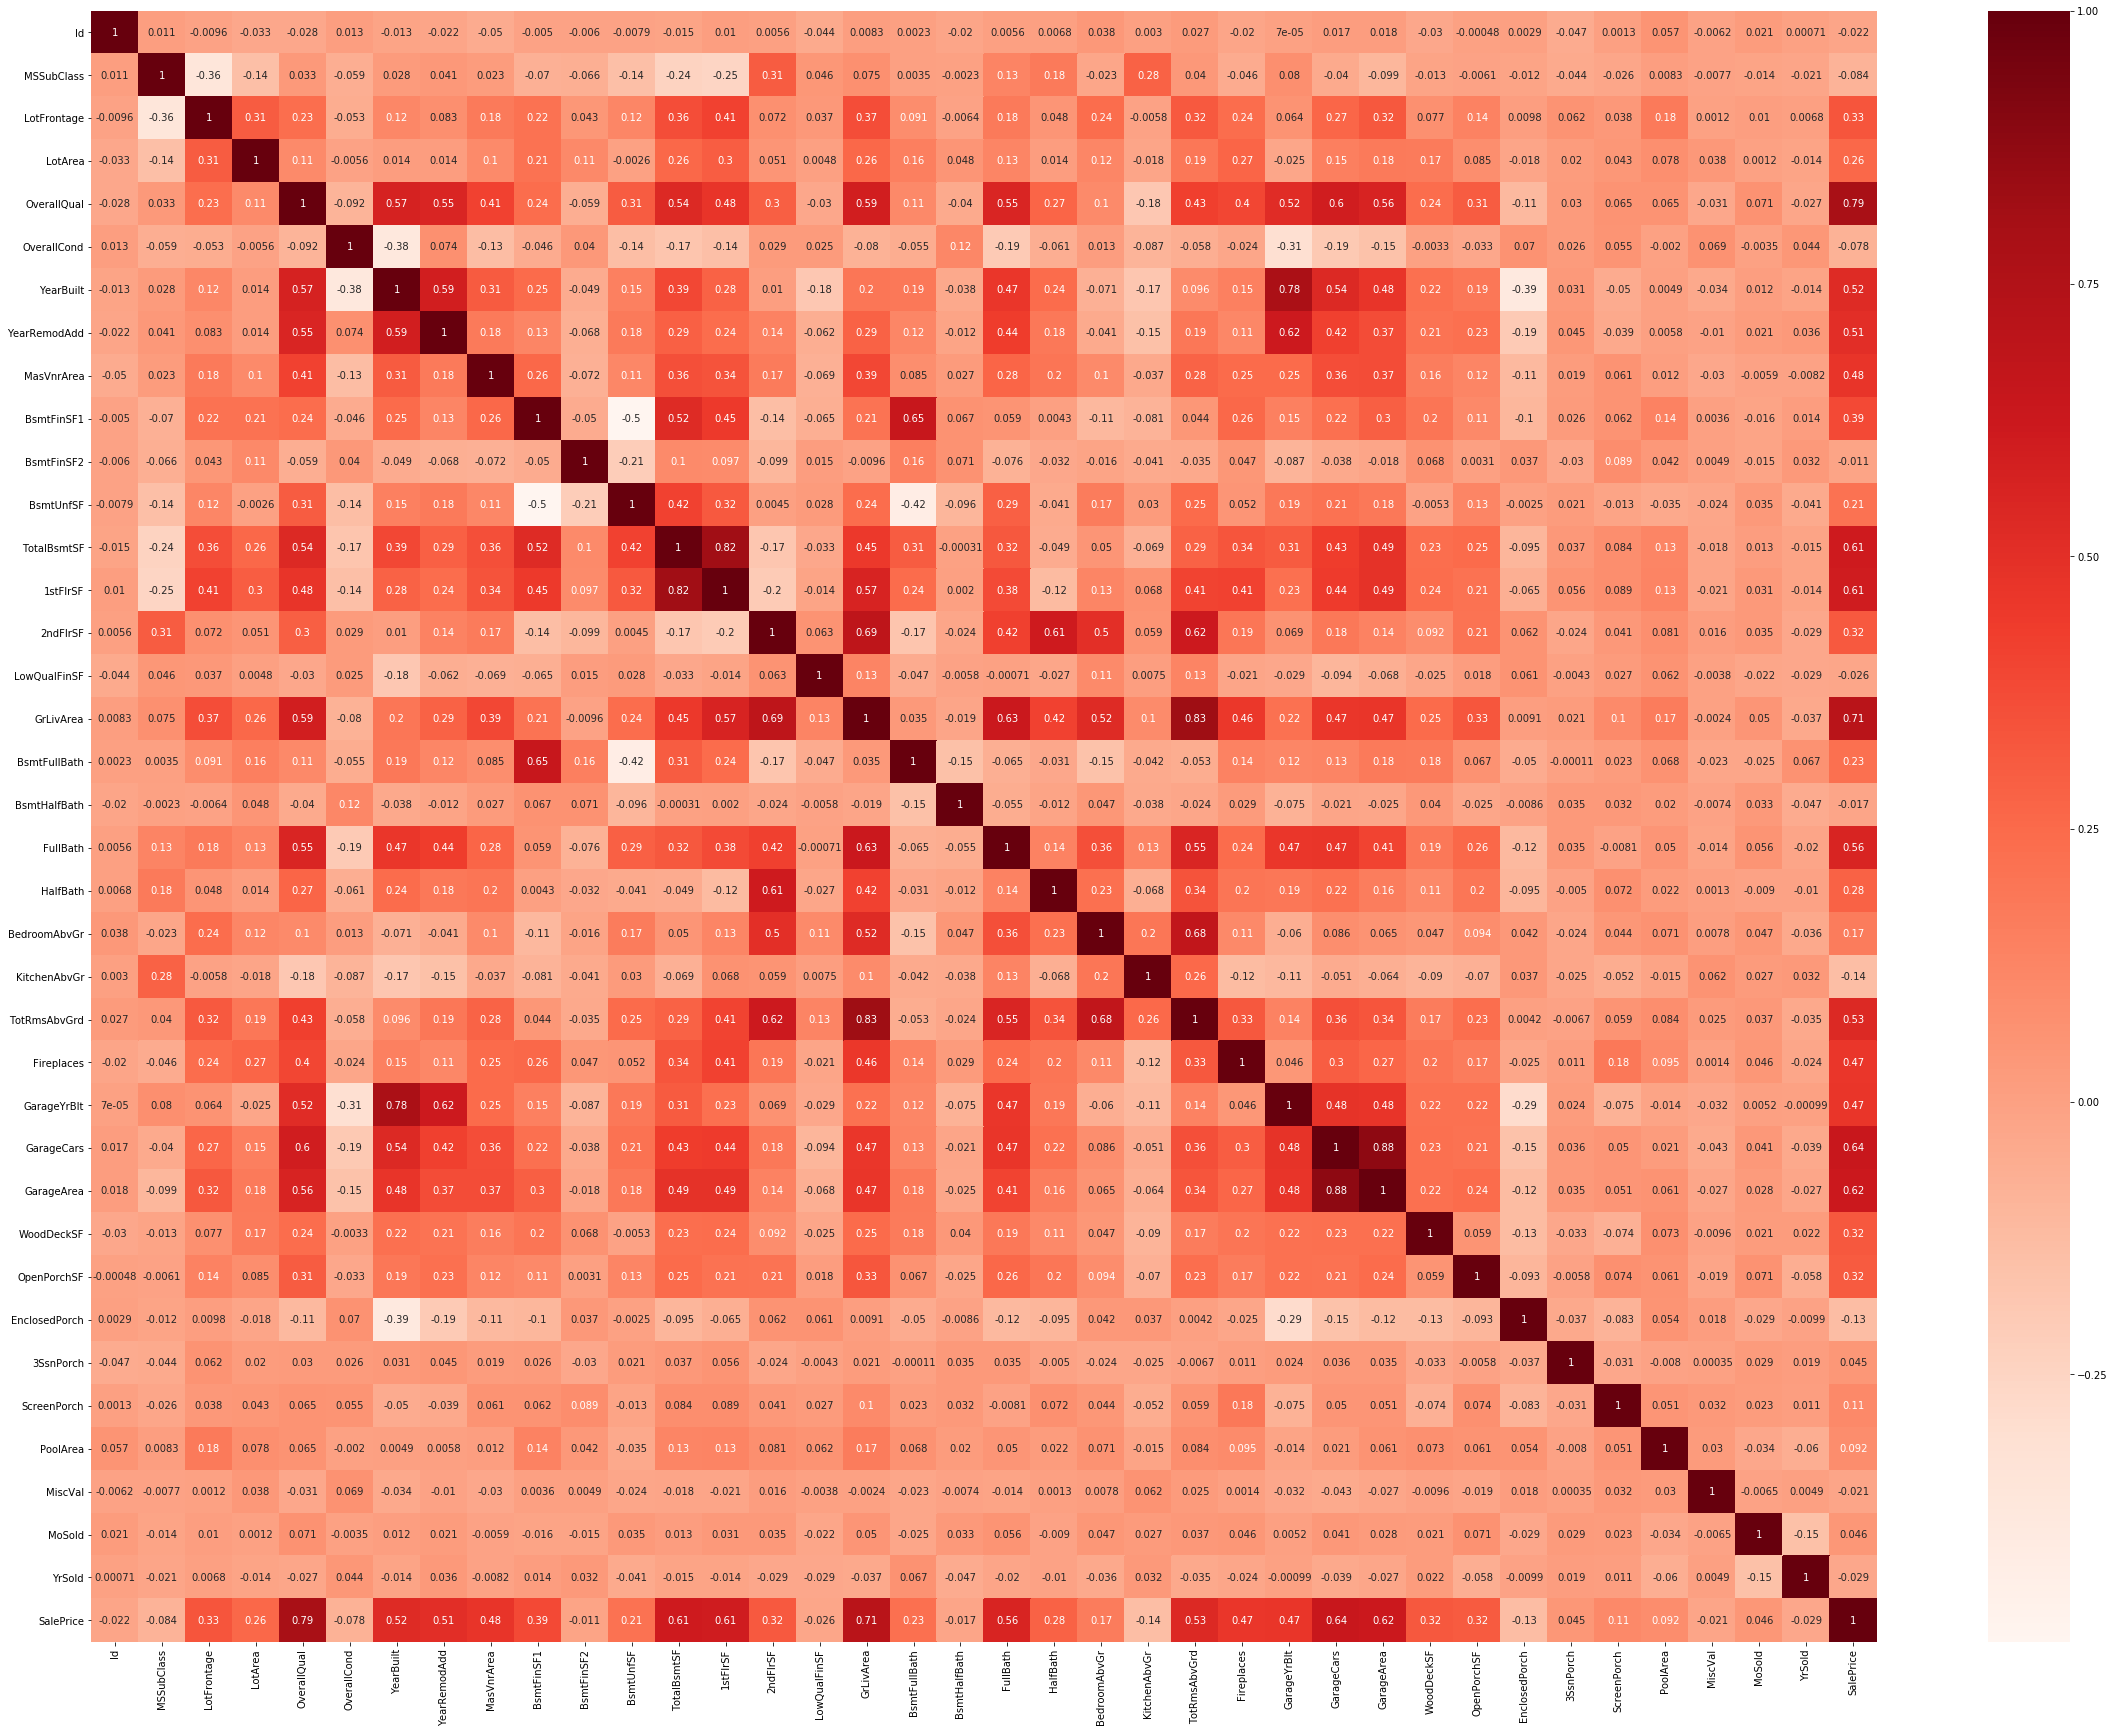

In [21]:
#pearson correlation heatmap

plt.figure()
corr = maindf.corr()
fig, ax = plt.subplots(figsize=(40,30))

sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)

plt.show()

In [22]:
print("Here are the columns with some high correlation coefficients. The general rule of thumb is that anything greater than .5 has a strong correlation.")
corr['SalePrice'].loc[corr['SalePrice'] > .5]

Here are the columns with some high correlation coefficients. The general rule of thumb is that anything greater than .5 has a strong correlation.


OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

# Model Selection: Gradient Boosted Trees (XGBoost)
_______________________________________________________
We are going to use a Regression based approach to create estimations for this dataset. 

We are, somewhat arbitrarily, selecting XGBoost here for our model of choice. The arbitrary piece comes from my interest in seeing how it performs and being familiar with the setup beforehand. 
The non-arbitrary pieces are that XGBoost is best used when you have >1000 training samples + <100 features, and features that are a mix of categorical and numerical are ideal. 

It is worth noting that XGBoost is an ensemble algorithm and therefore combines multiple algorithms together to improve performance.

More technical information about XGBoost can be found [on this documentation page](https://xgboost.readthedocs.io/en/latest/)

We're going to run it blind first to see a base RMSE accuracy that we get. Then we'll tune it and see our improvements.

In [23]:
X = encoded_df.drop('SalePrice', axis=1)
y = encoded_df['SalePrice']

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [25]:
#xgb instantiator
xgbmodel = xgb.XGBRegressor(seed=1, objective='reg:squarederror', n_estimators=10)

xgbmodel.fit(X_train, y_train)

predictions = xgbmodel.predict(X_test)

#First time run without validation or parameter tuning

from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root-Mean-Squared Error: {rmse}") 

Root-Mean-Squared Error: 76432.61562201343


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


So I'm not really sure how to interpret ~71k RMSE but if that's the difference between our estimation and the actual price then we can probably get closer with some hyper parameter tuning. 

We can tune the number of trees, depth of trees, # of variables to pull into each tree, etcetc.

In [26]:
onetunedxgb = xgb.XGBRegressor(seed = 1, objective='reg:squarederror', n_estimators=10)

onetunedxgb.fit(DM)

NameError: name 'DM' is not defined

# PH - Tuning Hyper-Parameters. 

In [27]:
#YOU WILL HAVE TO TRANSFORM THE DATA INTO DMATRIXES - both the test and train sets
#xgb.DMatrix --> This is so that XGB can use the data
 
DM_train = xgb.DMatrix(X_train, y_train)
DM_test = xgb.DMatrix(X_test, y_test)


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [28]:
#params

params = {
    'learning_rate': [0.1, 0.3, 0.5, 0.7, 0.9], #or is this still called 'eta' ?
    'booster': 'gblinear', #default is gbtree
    'max_depth': [2, 3],#used to control over-fitting, higher depth model will learn relations very specific to samples
    'n_estimators': [100, 200]
    'objective': 'multi:softprob', 
    'num_class': 3, #need this since our obj is multi:softprob
    'colsample_bytree': [.5, .7, .9] #default is 1, this is a fraction of how many columns will be sampled into each tree
}

steps = 10 #this is the number of iterations for training

SyntaxError: invalid syntax (<ipython-input-28-4f2036a82e7c>, line 8)

In [29]:
#model = xgb.train(params, >training dmatrix< , steps)

# PH - Cross Validation - Do we use GridSearchCV or another method? 

In [30]:
#use some cross validation methods , maybe GridSearchCV again??? 

# PH - New Model w/tuned params and CV. How are the results??

In [31]:
#rerun xgb instantiator

In [32]:
#Try to apply a StandardScalar because some of the metrics are in different units of measurement

# PH - First time doing this. Run a StandardScalar through variables, rerun model. Compare.

In [33]:
#compare results, prep solution file

In [34]:
#think this is gonna use the AUROC for accuracy, there should be a method inside the sklearn module to print it out
#also check out RMSE and or MEAN ABSOLUTE ERROR (MAE)

# PH - Evaluate final results, create submission file. 

In [35]:
#You have to do the same data configurations for the test.csv that you did on the train.csv before you go ahead and fit/predict.

# PH - Speak about results, accuracy score